# 演習3-2 次元圧縮

一般に高次元のデータは，可視化などが困難であるため，直感的にデータを理解することが難しいです．演習１で低次元（２次元）のデータを取り扱ったのも，直感的な理解を深めるためです．
その一方で，一般的なデータは高次元の場合がほとんどです．
そこで，高次元のデータを可視化したり，低次元に射影して使われる教師なし学習方法が次元圧縮と言われているものになります．
データを（２次元空間などの）低次元へ射影することで，可視化したり，データが表現される有効な空間のなかでの取り扱いをすることで，機械学習のアルゴリズムの効率を上げたりすることが次元圧縮の趣旨になります．

次元圧縮の方法としては，いくつかのやり方があります

- 主成分分析 （Principal Component Analysis: PCA）
- t-SNE, UMAP 局所構造を保ちながら次元を圧縮

などが比較的有名な方法です．ここでは簡単な主成分分析を取り上げます．
主成分分析は，データが最も拡がっている線形部分空間を取り出して，そこにデータ点を射影します．

## 3-2-1. ３次元に埋め込まれたデータの主成分分析

まずは手始めに，視覚的な理解を目的として３次元空間に埋め込まれたデータを主成分分析を用いて２次元に射影して，次元圧縮を考えます．

下記のデータでは，３次現状の渦巻き構造を考えます

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# データ生成 (3次元空間に埋め込まれたスパイラル)
N = 500 # データ数
a = 0.9 # 螺旋の開き具合

# 螺旋の方程式
theta = np.linspace(0, 4 * np.pi, N)  # 角度
z = np.linspace(0, 1, N)  # 高さ
r = a * z  # 半径
x = r * np.cos(theta)
y = r * np.sin(theta)
true_data_3d = np.vstack((x, y, z)).T

# データにノイズを載せる
sd = 0.02
data_3d = true_data_3d + np.random.randn(N*3).reshape(N, 3) * sd


これで `data_3d` に，３次元で５００個のサンプルデータが生成されます．
データは $R^3 \in \{(x, y, z)\mid [-1, 1] \times [-1, 1] \times [0, 1]\}$ な空間に埋め込まれているはずなので
可視化してみます．
パラメータ `a` をコントロールすることで，渦巻きの $x-y$ 方向のサイズを変えることができることを確認してみてください．

(0.0, 1.0)

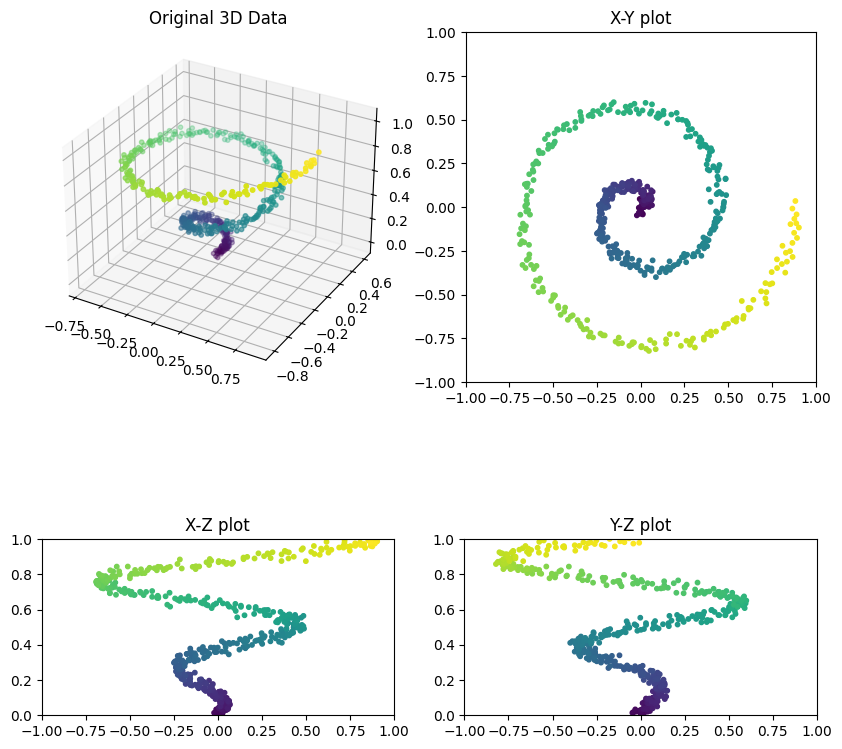

In [78]:
# 可視化
fig = plt.figure(figsize=(10, 10))

# 3D plot
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax0.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=theta, s=10, cmap='viridis')
ax0.set_title("Original 3D Data")

# X-Y plot
ax1 = fig.add_subplot(2, 2, 2)
ax1.scatter(data_3d[:, 0], data_3d[:, 1], c=theta, cmap='viridis', s=10)
ax1.set_title("X-Y plot")
ax1.set_aspect('equal')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)

# X-Z plot
ax2 = fig.add_subplot(2, 2, 3)
ax2.scatter(data_3d[:, 0], data_3d[:, 2], c=theta, cmap='viridis', s=10)
ax2.set_title("X-Z plot")
ax2.set_aspect('equal')
ax2.set_xlim(-1, 1)
ax2.set_ylim(0, 1)

# Y-Z plot
ax3 = fig.add_subplot(2, 2, 4)
ax3.scatter(data_3d[:, 1], data_3d[:, 2], c=theta, cmap='viridis', s=10)
ax3.set_title("Y-Z plot")
ax3.set_aspect('equal')
ax3.set_xlim(-1, 1)
ax3.set_ylim(0, 1)


#### PCA による主成分分析

主成分分析は，データ全体から，その拡がった方向を抽出します．
データ自体から広がり方という特性を取り出すことから，教師なし学習と捉えることができます．
実装自体は，さまざまなプラットフォームで実装されていますが，ここでは `scikit-learn` に実装されたもの(`sklearn.decomposition.PCA`: 以下 `PCA` クラスと呼びます)を使っていきます．

`PCA` クラスではインスタンスを作成する場合，どのくらいに次元を落とすかを指定します．
ここでは，可視化するために２次元を指定します．

`scikit-learn` を用いる場合，通常 `fit()` 関数を使うことで学習が行われます．
さらにデータを与えて，特性に合わせた変換を行うには， `fit_transform()` を用います．
主成分分析を用いた場合は，拡がった次元方向を特定し，データをその次元へ射影します．

In [79]:
from sklearn.decomposition import PCA

# PCAで次元圧縮 (2次元)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_3d)


Text(0.5, 1.0, 'PCA')

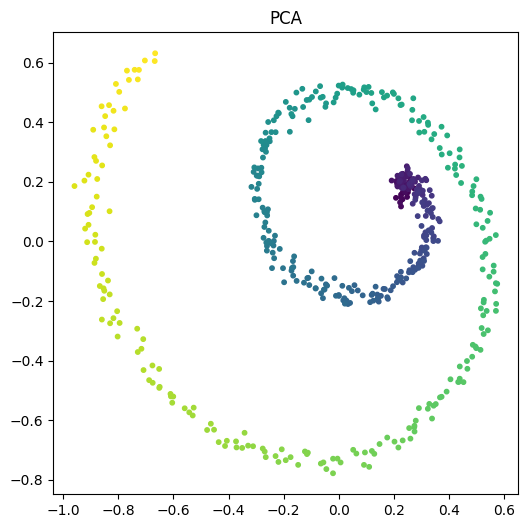

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(data_2d[:, 0], data_2d[:, 1], c=theta, cmap='viridis', s=10)
ax.set_title("PCA")



# 演習

データの広がりパラメータ `a` の大きさを $0 \sim 1$ の間で制御することによって，データがどの様に変化するかを確認しなさい．